### Data Source
S&P 500 (^GSPC) https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

S&P/Case-Shiller U.S. National Home Price Index (CSUSHPINSA) https://fred.stlouisfed.org/series/CSUSHPINSA

S&P/Case-Shiller FL-Miami Home Price Index (MIXRNSA) https://fred.stlouisfed.org/series/MIXRNSA

Average Hourly Earnings of Production and Nonsupervisory Employees: Total Private https://fred.stlouisfed.org/series/AHETPI

Consumer Price Index for All Urban Consumers: Owners' equivalent rent of residences https://fred.stlouisfed.org/series/CUSR0000SEHC

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "../Data/market analysis/"

### Data

In [3]:
# S&P 500
sp500_df = pd.read_csv(data_path + '^GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

sp500_df = sp500_df[['Date','Adj Close']]
sp500_df.columns = ['Date', 'SP500_Close']
print(np.min(sp500_df['Date'] ))
print(np.max(sp500_df['Date'] ))
sp500_df = sp500_df.sort_values('Date', ascending=True) # sort in ascending date order
sp500_df.tail()

1927-12-30 00:00:00
2019-11-27 00:00:00


Date  SP500_Close
23082 2019-11-21  3103.540039
23083 2019-11-22  3110.290039
23084 2019-11-25  3133.639893
23085 2019-11-26  3140.520020
23086 2019-11-27  3153.629883

In [4]:
# S&P/Case-Shiller U.S. National Home Price Index (CSUSHPINSA)

caseshill_df = pd.read_csv(data_path + 'CSUSHPINSA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])
caseshill_df.columns = ['Date', 'Case-Shiller']
caseshill_df = caseshill_df.sort_values('Date')
print(np.min(caseshill_df['Date'] ))
print(np.max(caseshill_df['Date'] ))
caseshill_df.tail()

1987-01-01 00:00:00
2019-09-01 00:00:00


Date  Case-Shiller
388 2019-05-01       209.624
389 2019-06-01       210.843
390 2019-07-01       211.585
391 2019-08-01       211.947
392 2019-09-01       212.203

In [5]:
# S&P/Case-Shiller FL-Miami Home Price Index (MIXRNSA)

caseshill_df_MIA = pd.read_csv(data_path + 'MIXRNSA.csv')
caseshill_df_MIA['DATE'] = pd.to_datetime(caseshill_df_MIA['DATE'])
caseshill_df_MIA.columns = ['Date', 'Case-Shiller']
caseshill_df_MIA = caseshill_df_MIA.sort_values('Date')
print(np.min(caseshill_df_MIA['Date'] ))
print(np.max(caseshill_df_MIA['Date'] ))
caseshill_df_MIA.tail()

1987-01-01 00:00:00
2019-09-01 00:00:00


Date  Case-Shiller
388 2019-05-01    242.956876
389 2019-06-01    243.230822
390 2019-07-01    244.098270
391 2019-08-01    244.913947
392 2019-09-01    245.656527

In [6]:
# Average Hourly Earnings of Production and Nonsupervisory Employees, Total Private (AHETPI)

avghourly_df = pd.read_csv(data_path + 'AHETPI.csv')
avghourly_df['DATE'] = pd.to_datetime(avghourly_df['DATE'])
avghourly_df.columns = ['Date', 'AHETPI']
avghourly_df = avghourly_df.sort_values('Date')
print(np.min(avghourly_df['Date'] ))
print(np.max(avghourly_df['Date'] ))
avghourly_df.tail()

1964-01-01 00:00:00
2019-10-01 00:00:00


Date  AHETPI
665 2019-06-01   23.43
666 2019-07-01   23.51
667 2019-08-01   23.60
668 2019-09-01   23.66
669 2019-10-01   23.70

In [7]:
# Consumer Price Index for All Urban Consumers: Owners' Equivalent Rent of Residences in U.S. City Average (CUSR0000SEHC)

cpi_df = pd.read_csv(data_path + 'CUSR0000SEHC.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
cpi_df.columns = ['Date', 'CPI']
cpi_df = cpi_df.sort_values('Date')
print(np.min(cpi_df['Date'] ))
print(np.max(cpi_df['Date'] ))
cpi_df.tail()

1983-01-01 00:00:00
2019-10-01 00:00:00


Date      CPI
437 2019-06-01  325.518
438 2019-07-01  326.317
439 2019-08-01  327.046
440 2019-09-01  327.923
441 2019-10-01  328.529

### Plot

In [8]:
cut_off_date = '1988-01-01'

sp500_df_tmp = sp500_df.copy()
caseshill_df_tmp = caseshill_df.copy()
caseshill_df_MIA_tmp = caseshill_df_MIA.copy()
avghourly_df_tmp = avghourly_df.copy()
cpi_df_tmp = cpi_df.copy()

sp500_df_tmp = sp500_df_tmp[sp500_df_tmp['Date'] >= cut_off_date]
caseshill_df_tmp = caseshill_df_tmp[caseshill_df_tmp['Date'] >= cut_off_date]
caseshill_df_MIA_tmp = caseshill_df_MIA_tmp[caseshill_df_MIA_tmp['Date'] >= cut_off_date]
avghourly_df_tmp = avghourly_df_tmp[avghourly_df_tmp['Date'] >= cut_off_date]
cpi_df_tmp = cpi_df_tmp[cpi_df_tmp['Date'] >= cut_off_date]

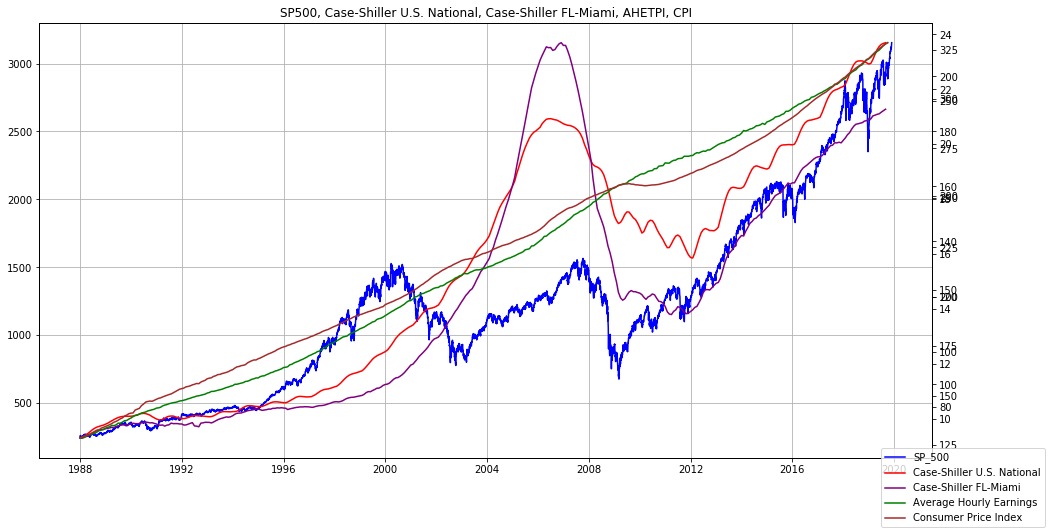

In [9]:
# Plotting all datasets
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(sp500_df_tmp['Date'], sp500_df_tmp['SP500_Close'] , color='blue', label='SP500')
plt.title('Market Analysis')
plt.grid()

# Get new axis
ax2 = ax.twinx()
plt.plot(caseshill_df_tmp['Date'], caseshill_df_tmp['Case-Shiller'] , color='red', label='Case-Shiller U.S. National')

# Get new axis
ax3 = ax.twinx()
plt.plot(caseshill_df_MIA_tmp['Date'], caseshill_df_MIA_tmp['Case-Shiller'] , color='purple', label='Case-Shiller FL-Miami')

# Get new axis
ax4 = ax.twinx()
plt.plot(avghourly_df_tmp['Date'], avghourly_df_tmp['AHETPI'] , color='green', label='Average Hourly Earnings')

# Get new axis
ax5 = ax.twinx()
plt.plot(cpi_df_tmp['Date'], cpi_df_tmp['CPI'] , color='brown', label='Consumer Price Index')

fig.legend(loc="lower right")
plt.show()

### Adjusting for 2012 = 100
This is done in order to describe all curves using the same scale.

In [11]:
sp500_df_tmp[sp500_df_tmp['Date'] == '2012-01-03']

Date  SP500_Close
21097 2012-01-03  1277.060059

In [12]:
sp500_df_tmp['SP500_Close-adj'] = sp500_df_tmp['SP500_Close'] * 100/1277.060059

In [13]:
caseshill_df_tmp[caseshill_df_tmp['Date'] == '2012-01-01']

Date  Case-Shiller
300 2012-01-01       134.164

In [14]:
caseshill_df_tmp['Case-Shiller-adj'] = caseshill_df_tmp['Case-Shiller'] * 100/134.164
caseshill_df_MIA_tmp['Case-Shiller-adj'] = caseshill_df_MIA_tmp['Case-Shiller'] * 100/134.164

In [15]:
avghourly_df[avghourly_df['Date'] == '2012-01-01']

Date  AHETPI
576 2012-01-01   19.58

In [16]:
avghourly_df_tmp['AHETPI-adj'] = avghourly_df_tmp['AHETPI'] * 100/19.58

In [17]:
cpi_df[cpi_df['Date'] == '2012-01-01']

Date      CPI
348 2012-01-01  262.366

In [18]:
cpi_df_tmp['CPI-adj'] = cpi_df_tmp['CPI'] * 100/262.366

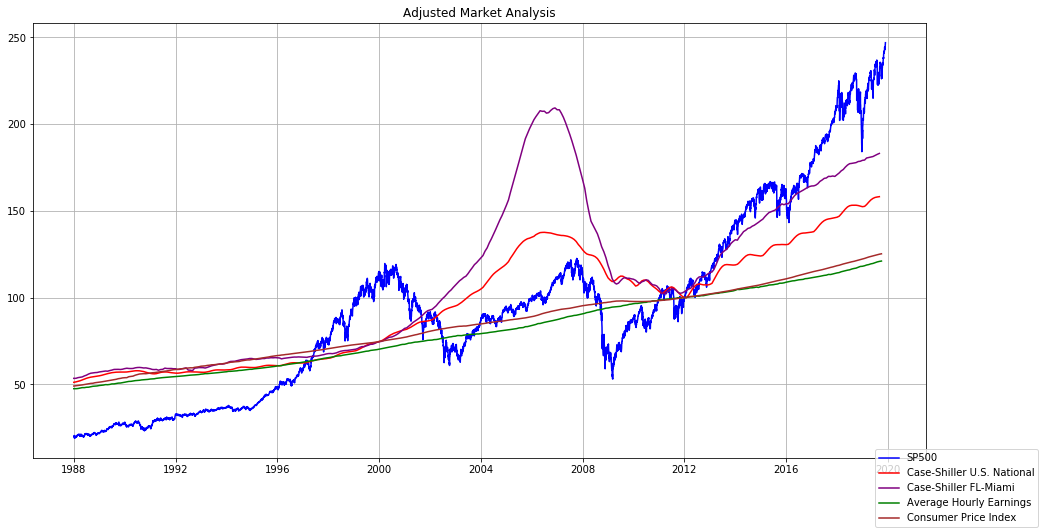

In [22]:
# Plotting all datasets using the same scale (adjusted for 2012 = 100)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp500_df_tmp['Date'], sp500_df_tmp['SP500_Close-adj'] , color='blue', label='SP500')
plt.title('Adjusted Market Analysis')
 
plt.plot(caseshill_df_tmp['Date'], caseshill_df_tmp['Case-Shiller-adj'] , color='red', label='Case-Shiller U.S. National')

plt.plot(caseshill_df_MIA_tmp['Date'], caseshill_df_MIA_tmp['Case-Shiller-adj'] , color='purple', label='Case-Shiller FL-Miami')
 
plt.plot(avghourly_df_tmp['Date'], avghourly_df_tmp['AHETPI-adj'] , color='green', label='Average Hourly Earnings')
 
plt.plot(cpi_df_tmp['Date'], cpi_df_tmp['CPI-adj'] , color='brown', label='Consumer Price Index')

fig.legend(loc="lower right")
plt.grid()
plt.show()